In [186]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
import os
from cartopy.io.img_tiles import OSM
import numpy as np
from PIL import Image
from scipy.interpolate import griddata
import cartopy.io.img_tiles as tile
import pandas as pd
from pyproj import Proj, transform
import h5py
from scipy import io,signal
import pandas as pd
import glob
import obspy
from matplotlib.offsetbox import AnchoredText

import sys
sys.path.append('/home/yaolinm/Projects/Mexico2/')
sys.path.append('/home/yaolinm/Projects/Mexico/a1das-v2-main/')

from funcs.bp import *
from funcs.mccc import *
from funcs.utils import *
from a1das import core

In [38]:
lati1=17
lati2=21
long1=-104
long2=-98

xlocs = np.linspace(long1, long2, 5)
ylocs = np.linspace(lati1, lati2, 5)
ylocs[0]+=0.001
xlocs_minor = np.linspace(long1, long2, 9)
ylocs_minor = np.linspace(lati1, lati2, 9)

from scipy.io import loadmat

fib_lons=loadmat('/home/yaolinm/Projects/Mexico/EGF/posfib.mat')['x0'][0]
fib_lats=loadmat('/home/yaolinm/Projects/Mexico/EGF/posfib.mat')['y0'][0]

import netCDF4 as nc
import cmocean
# file='/home/yaolinm/Projects/Mexico2/data/gebco_2024_n21.0_s17.0_w-103.5_e-98.5.nc'
# dataset = nc.Dataset(file, 'r')
# variable = dataset.variables['elevation']
# bmap1 = np.flipud(variable[:])[:720,:]

# file='/home/yaolinm/Projects/Mexico2/data/gebco_2024_n21.0_s16.0_w-106.0_e-101.0.nc'
# dataset = nc.Dataset(file, 'r')
# variable = dataset.variables['elevation']
# bmap2 = np.flipud(variable[:])[240:960,:]

file='/home/yaolinm/Projects/Mexico2/data/gebco_2024_n20.0_s17.0_w-104.5_e-98.5.nc'
dataset = nc.Dataset(file, 'r')
variable = dataset.variables['elevation']
bmap = np.flipud(variable[:])

# Global station + DAS

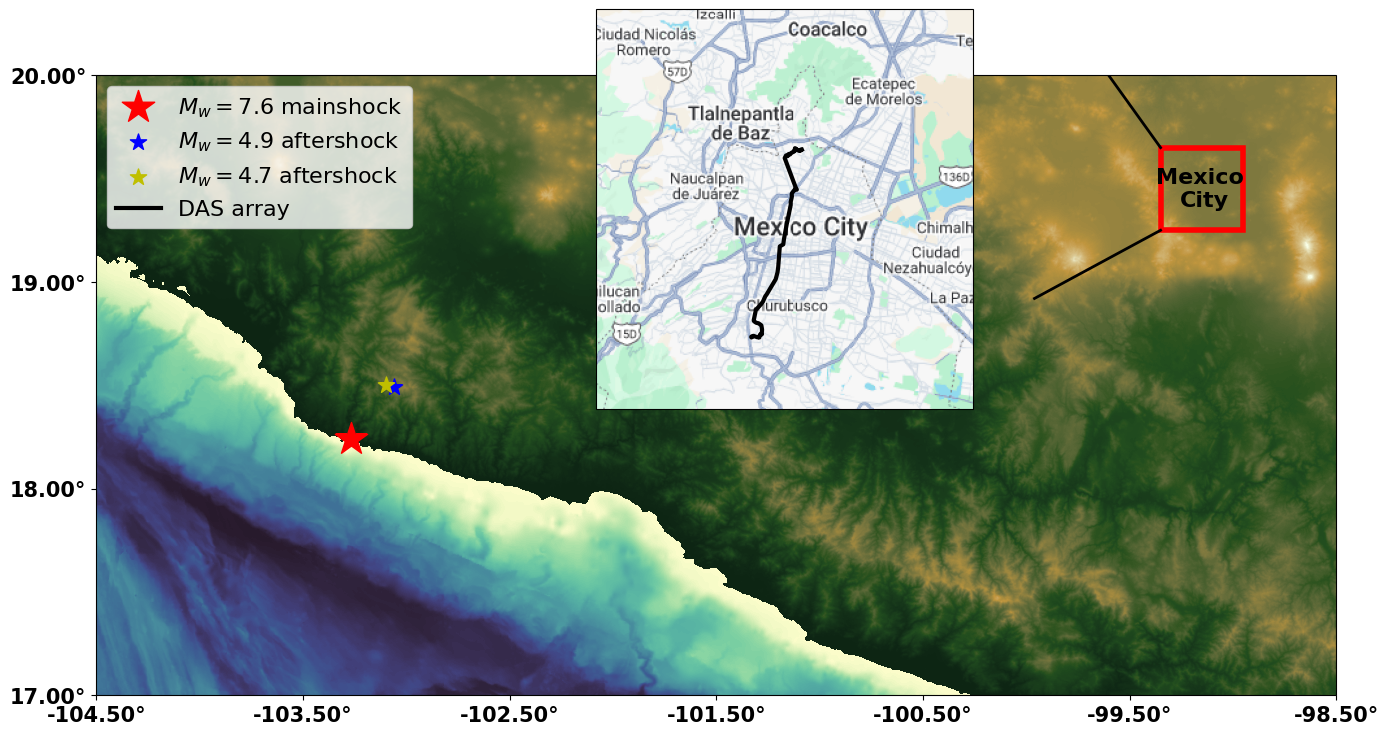

In [43]:
# imagery = tile.GoogleTiles(style='satellite')
lati1=17
lati2=20
long1=-104.5
long2=-98.5

xlocs = np.linspace(long1, long2, 7)
ylocs = np.linspace(lati1, lati2, 4)
ylocs[0]+=0.001
xlocs_minor = np.linspace(long1, long2, 9)
ylocs_minor = np.linspace(lati1, lati2, 9)


fig = plt.figure(figsize=(16,16)) # 40,40
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
bs=plt.imshow(bmap[:,:],cmap=cmocean.cm.topo,vmin=-5000,vmax=5000,
              alpha=1,extent=[-104.5,-98.5,17,20],transform=ccrs.PlateCarree())
ax.set_xlim((long1, long2))
ax.set_ylim((lati1, lati2))
ax.set_xticks(xlocs,crs=ccrs.PlateCarree())
ax.set_yticks(ylocs,crs=ccrs.PlateCarree())
ax.set_xticklabels(labels=["%.2f°" % x for x in xlocs], fontsize=15,weight='bold')
ax.set_yticklabels(labels=["%.2f°" % y for y in ylocs], fontsize=15,weight='bold')

ax.set_extent([long1,long2,lati1,lati2], ccrs.PlateCarree())

ax.scatter(-103.269,18.2377,marker='*',c='r',s=600,transform=ccrs.PlateCarree(),label='$M_w = 7.6$ mainshock')
ax.scatter(-103.06,18.49,marker='*',c='b',s=150,transform=ccrs.PlateCarree(),label='$M_w = 4.9$ aftershock')
ax.scatter(-103.0997,18.5012,marker='*',c='y',s=150,transform=ccrs.PlateCarree(),label='$M_w = 4.7$ aftershock')
# ax.scatter(-99.179,19.329,marker='^',c='red',s=300,transform=ccrs.PlateCarree(),label='PZIG')
ax.plot([0,0],[0,0],lw=3,c='k',transform=ccrs.PlateCarree(),label='DAS array')
ax.legend(loc=2,fontsize=16)

ax.plot([-99.96,-99.35],[18.92,19.25],c='k',lw=2,transform=ccrs.PlateCarree())
ax.plot([-99.96,-99.35],[20.5,19.65],c='k',lw=2,transform=ccrs.PlateCarree())

rect=Rectangle((-99.35,19.25),0.4,0.4,linewidth=4,edgecolor='r',facecolor='none',transform=ccrs.PlateCarree())
ax.add_patch(rect)

ax.text(-99.14,19.45,'Mexico \nCity',c='k',fontsize=16,va='center',ha='center',weight='bold',transform=ccrs.PlateCarree())
# ax.text(-101.5,18.5,'Epi. Distance: $> 450 km$',c='k',fontsize=20,va='center',weight='bold',ha='left',transform=ccrs.PlateCarree())
# ax.text(-101.5,18.2,'Azimuth Aperture:$~3^{\circ}$',c='k',fontsize=20,va='center',weight='bold',ha='left',transform=ccrs.PlateCarree())

# ax.set_xlabel('Longitude',fontsize=25,weight='bold')
# ax.set_ylabel('Latitude', fontsize=25,weight='bold')

imagery=tile.GoogleTiles()
ax2 = fig.add_axes([0.43,0.48,0.25,0.25],projection=imagery.crs)
lati1=19.25
lati2=19.65
long1=-99.35
long2=-98.95
ax2.set_xlim((long1, long2))
ax2.set_ylim((lati1, lati2))

ax2.set_extent([long1,long2,lati1,lati2], ccrs.PlateCarree())

ax2.add_image(imagery,10)
ax2.plot(fib_lons,fib_lats,lw=3,c='k',transform=ccrs.PlateCarree(),label='DAS array')
# ax2.scatter(-99.179,19.329,marker='^',c='red',s=600,transform=ccrs.PlateCarree(),label='PZIG')

In [4]:
import pandas as pd

df = pd.read_csv('data/stations_data.csv')
stations = df["Station"].tolist()
distances = df["Distance"].tolist()
azimuths = df["Azimuth"].tolist()
networks = df["Network"].tolist()
longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

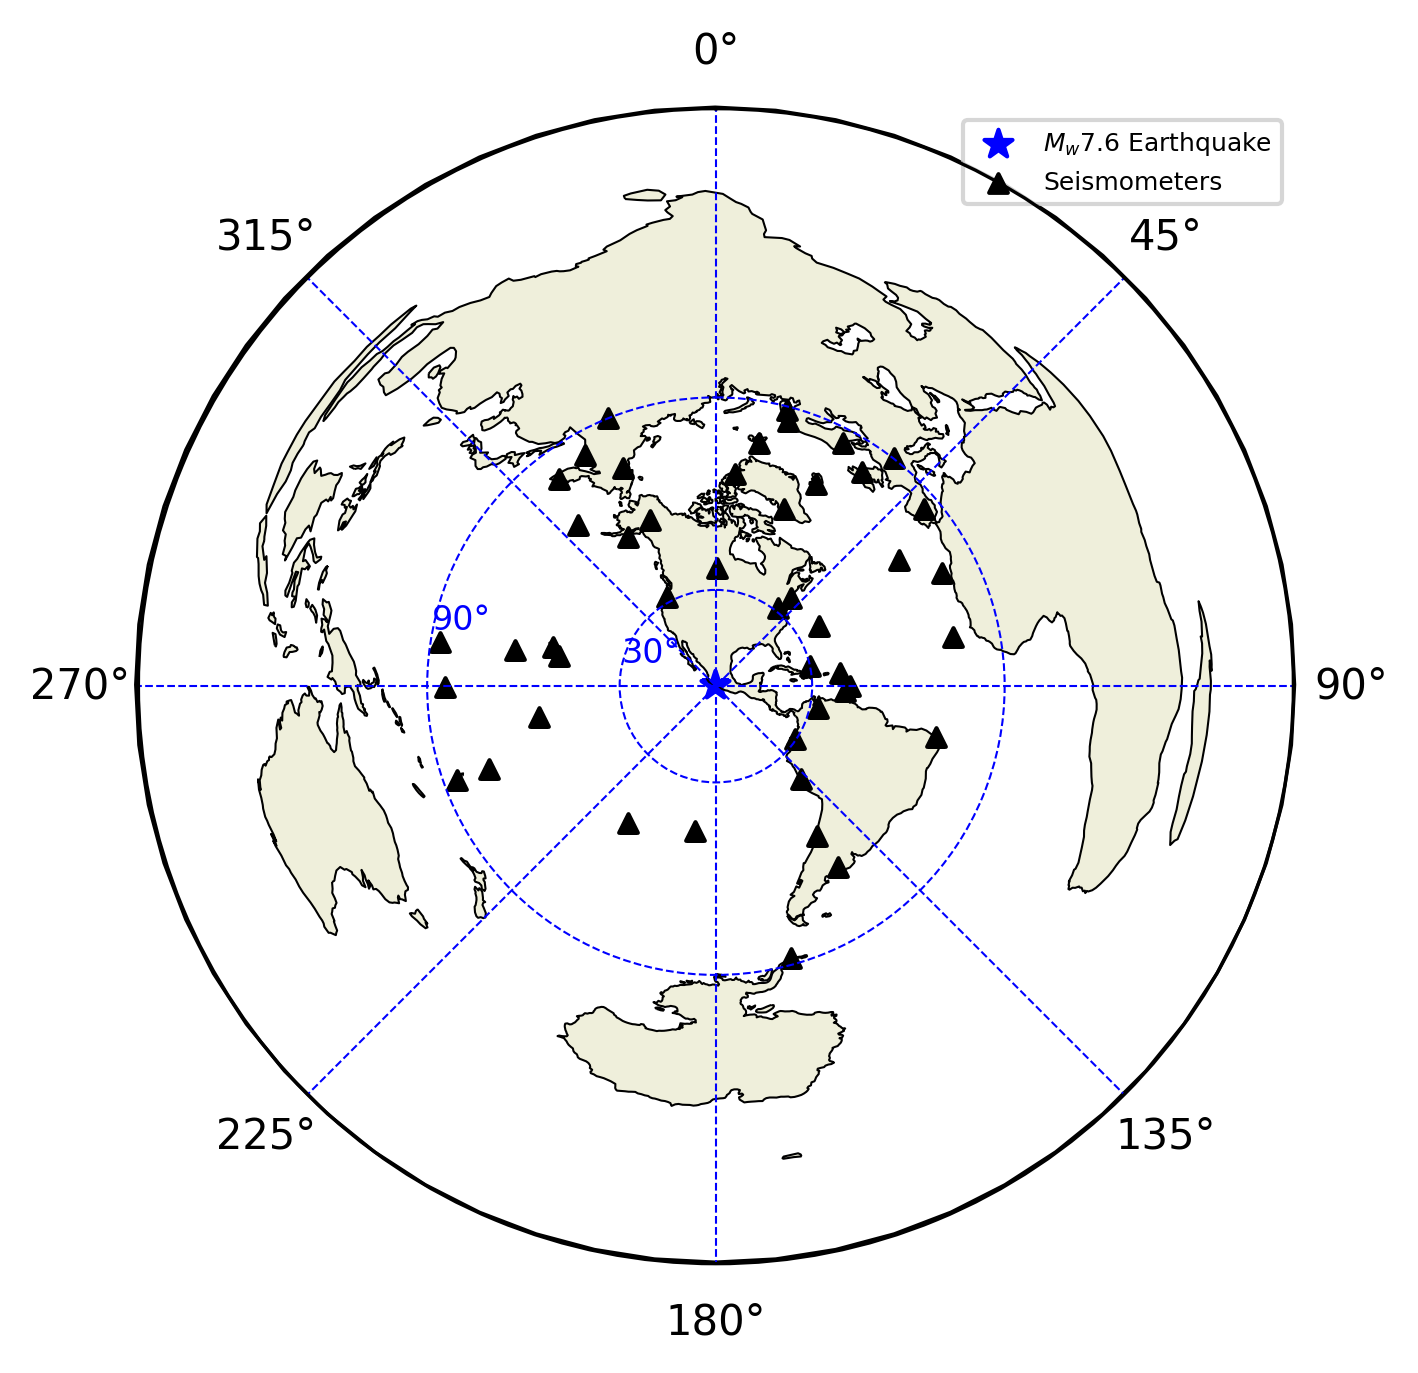

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Create figure and axis
fig = plt.figure(figsize=(5, 5), dpi=300)
proj = ccrs.AzimuthalEquidistant(central_longitude=-102.9818, central_latitude=18.4967)
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add map features
ax.set_global()
ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.LAND)

# Add earthquake and seismometers
ax.scatter(-102.9818, 18.4967, marker='*', c='blue', s=50, transform=ccrs.PlateCarree(), label='$M_w 7.6$ Earthquake')
ax.scatter(longitudes, latitudes, marker='^', c='k', s=20, transform=ccrs.PlateCarree(), label='Seismometers')


# Overlay an empty polar plot for axis labels
polar_ax = fig.add_axes([0.128, 0.109, 0.77, 0.77], projection='polar', facecolor='none')
polar_ax.set_ylim(0, 180)
polar_ax.set_yticks([30,90])  
polar_ax.set_yticklabels(["30°", "90°" ], fontsize=8, color="blue") 
polar_ax.set_theta_zero_location("N")
polar_ax.set_theta_direction(-1)  
polar_ax.set_rlabel_position(280)  
polar_ax.grid(True, linestyle="--", c='blue',linewidth=0.5) 

polar_ax.set_frame_on(True) 
ax.legend(fontsize=6)
plt.show()


In [177]:
mainshock=np.array(h5py.File('/nfs/turbo/lsa-zspica/work/yaolinm/Mexico/DAS/2022-09-19_18-01-36_UTC_10min_50hz.h5','r')['DAS'])
S_seismogram=(obspy_filter(mainshock,0.2,1,50)[:,12000:27000])

Text(0.5, 0, 'Time [sec]')

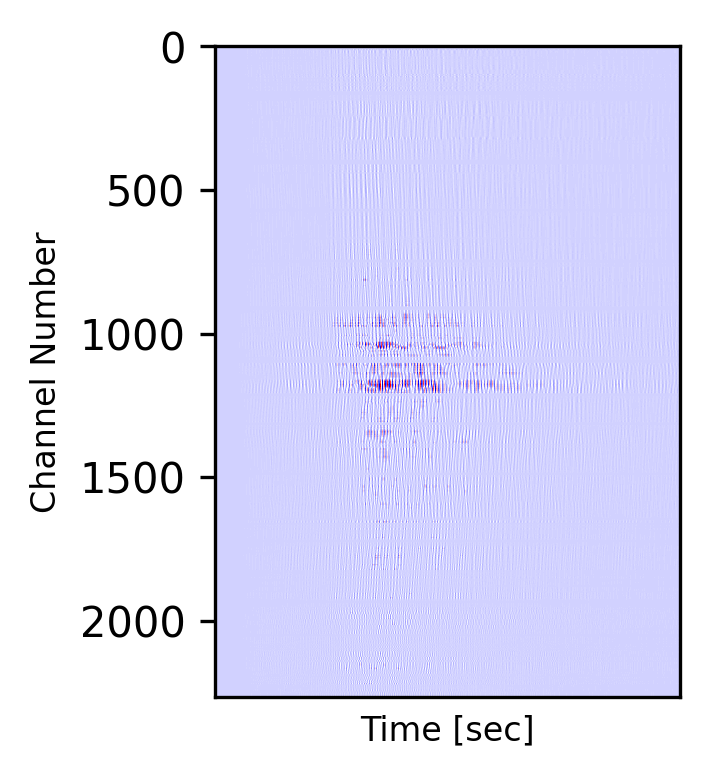

In [32]:
fig = plt.figure(dpi=300, figsize=(2,4))
gs = fig.add_gridspec(nrows=7, ncols=6, wspace=0, hspace=0.3)
ax1=fig.add_subplot(gs[:5, :6])

ax1.imshow(normalize(S_seismogram[:,1800:]),aspect='auto',cmap='seismic')
# ax1.set_ylim(0,1889)
ax1.set_ylabel('Channel Number',fontsize=8)
ax1.set_xticks([])

ax1.set_xlabel('Time [sec]',fontsize=8)
# ax1.set_xticks([0,1000,2000,3000])
# ax1.set_xticklabels([0,20,40,60],fontsize=6)
# ax1.set_xlim(0,3000)

# Master

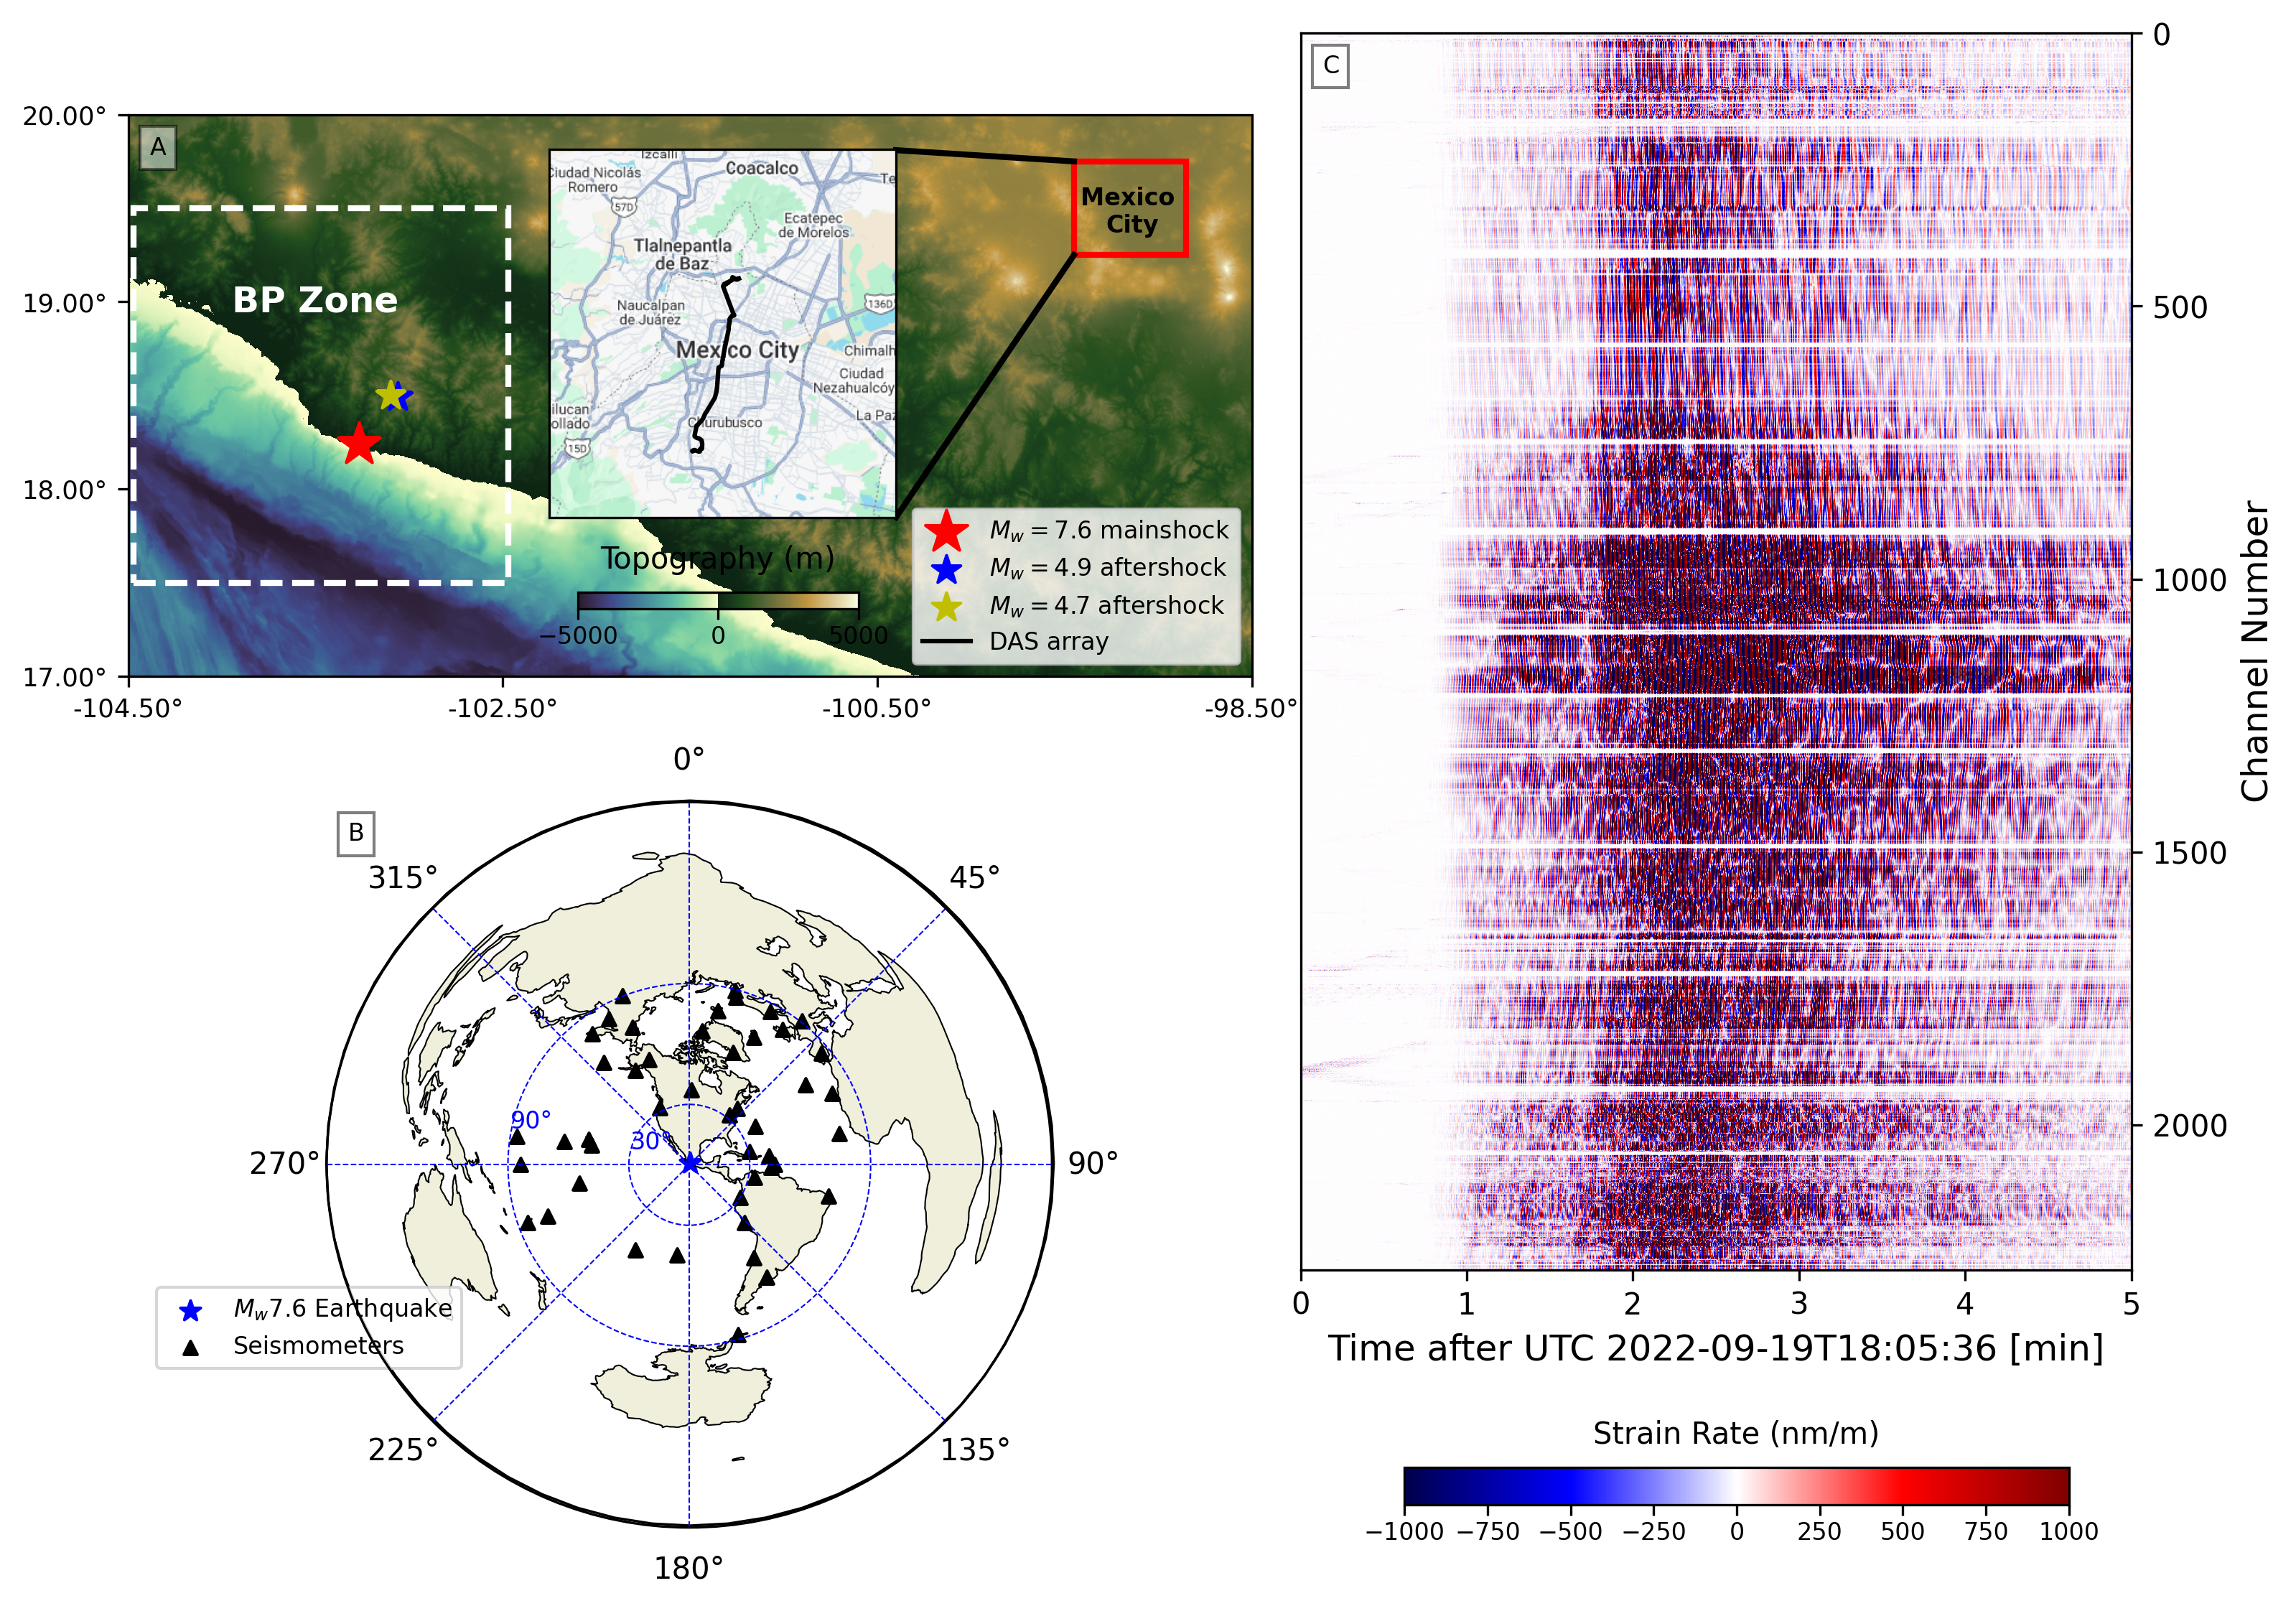

In [214]:
fig=plt.figure(dpi=300,figsize=(12,9))
fig.subplots_adjust(hspace=0.2,wspace=0.2)


ax0 = plt.subplot2grid(shape=(6,7), loc=(0,0), colspan=4,rowspan=3,projection=cartopy.crs.PlateCarree())
ax1 = plt.subplot2grid(shape=(6,7), loc=(3,0), colspan=4,rowspan=3,projection=ccrs.AzimuthalEquidistant(central_longitude=-102.9818, central_latitude=18.4967))
ax2 = plt.subplot2grid(shape=(6,7), loc=(0,4), colspan=3,rowspan=5)

lati1=17
lati2=20
long1=-104.5
long2=-98.5

xlocs = np.linspace(long1, long2, 4)
ylocs = np.linspace(lati1, lati2, 4)
ylocs[0]+=0.001
bs=ax0.imshow(bmap[:,:],cmap=cmocean.cm.topo,vmin=-5000,vmax=5000,
              alpha=1,extent=[-104.5,-98.5,17,20],transform=ccrs.PlateCarree())
ax0.set_xlim((long1, long2))
ax0.set_ylim((lati1, lati2))
ax0.set_xticks(xlocs,crs=ccrs.PlateCarree())
ax0.set_yticks(ylocs,crs=ccrs.PlateCarree())
ax0.set_xticklabels(labels=["%.2f°" % x for x in xlocs], fontsize=8.5)
ax0.set_yticklabels(labels=["%.2f°" % y for y in ylocs], fontsize=8.5)

ax0.set_extent([long1,long2,lati1,lati2], ccrs.PlateCarree())

ax0.scatter(-103.269,18.2377,marker='*',c='r',s=220,transform=ccrs.PlateCarree(),label='$M_w = 7.6$ mainshock')
ax0.scatter(-103.06,18.49,marker='*',c='b',s=100,transform=ccrs.PlateCarree(),label='$M_w = 4.9$ aftershock')
ax0.scatter(-103.0997,18.5012,marker='*',c='y',s=100,transform=ccrs.PlateCarree(),label='$M_w = 4.7$ aftershock')
ax0.plot([0,0],[0,0],lw=1.5,c='k',transform=ccrs.PlateCarree(),label='DAS array')
ax0.legend(loc=4,fontsize=8)

rect=Rectangle((-104.47,17.5),2,2,linewidth=2,edgecolor='white',linestyle='--',facecolor='none',transform=ccrs.PlateCarree())
ax0.add_patch(rect)
ax0.text(-103.5,19,'BP Zone',c='white',fontsize=12,va='center',ha='center',weight='bold',transform=ccrs.PlateCarree())

rect=Rectangle((-99.45,19.25),0.6,0.5,linewidth=2,edgecolor='r',facecolor='none',transform=ccrs.PlateCarree())
ax0.add_patch(rect)
ax0.text(-99.14,19.48,'Mexico \nCity',c='k',fontsize=8,va='center',ha='center',weight='bold',transform=ccrs.PlateCarree())
ax0.plot([-99.45,-100.4],[19.25,17.85],c='k',lw=2,transform=ccrs.PlateCarree())
ax0.plot([-99.45,-100.4],[19.75,19.81],c='k',lw=2,transform=ccrs.PlateCarree())

cax1 = ax0.inset_axes([0.4, 0.12, 0.25, 0.03]) 
cbar1 = fig.colorbar(bs, cax=cax1, orientation='horizontal')
cbar1.set_label('Topography (m)', fontsize=10, labelpad=8,c='k')
cbar1.ax.xaxis.set_label_position("top")
cbar1.ax.tick_params(labelsize=8, pad=2, colors='k') 
for spine in cbar1.ax.spines.values():
    spine.set_color('k')

imagery=tile.GoogleTiles()
ax3 = fig.add_axes([0.26,0.63,0.19,0.19],projection=imagery.crs)
lati1=19.25
lati2=19.65
long1=-99.35
long2=-98.95
ax3.set_xlim((long1, long2))
ax3.set_ylim((lati1, lati2))
ax3.set_extent([long1,long2,lati1,lati2], ccrs.PlateCarree())
ax3.add_image(imagery,10)
ax3.plot(fib_lons,fib_lats,lw=1.5,c='k',transform=ccrs.PlateCarree(),label='DAS array')

ax1.set_global()
ax1.coastlines(linewidth=0.5)
ax1.add_feature(cfeature.LAND)
ax1.scatter(-102.9818, 18.4967, marker='*', c='blue', s=50, transform=ccrs.PlateCarree(), label='$M_w 7.6$ Earthquake')
ax1.scatter(longitudes, latitudes, marker='^', c='k', s=20, transform=ccrs.PlateCarree(), label='Seismometers')

polar_ax = fig.add_axes([0.155, 0.109, 0.3742,0.3742], projection='polar', facecolor='none')
polar_ax.set_ylim(0, 180)
polar_ax.set_yticks([30,90])  
polar_ax.set_yticklabels(["30°", "90°" ], fontsize=8, color="blue") 
polar_ax.set_theta_zero_location("N")
polar_ax.set_theta_direction(-1)  
polar_ax.set_rlabel_position(280)  
polar_ax.grid(True, linestyle="--", c='blue',linewidth=0.5) 

polar_ax.set_frame_on(True) 
ax1.legend(fontsize=8,loc=3, bbox_to_anchor=(-0.25, 0.2, 0.5, 0.5))

wf=ax2.imshow(S_seismogram[:,:],aspect='auto',cmap='seismic',vmin=-1000,vmax=1000)
ax2.set_ylabel('Channel Number',fontsize=12)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position("right")
ax2.set_xticks([0,3000,6000,9000,12000,15000])
ax2.set_xticklabels([0,1,2,3,4,5])
ax2.set_xlabel('Time after UTC 2022-09-19T18:05:36 [min]',fontsize=12)

cax1 = ax2.inset_axes([0.125, -0.19, 0.8, 0.03]) 
cbar1 = fig.colorbar(wf, cax=cax1, orientation='horizontal')
cbar1.set_label('Strain Rate (nm/m)', fontsize=10, labelpad=8)
cbar1.ax.xaxis.set_label_position("top")
cbar1.ax.tick_params(labelsize=8, pad=2) 

at = AnchoredText('A',prop=dict(size=8), frameon=True,loc=2)
at.patch.set_boxstyle('round',pad=0,rounding_size=0)
at.patch.set_facecolor((1, 1, 1, 0.5))  
at.patch.set_edgecolor((0, 0, 0, 0.5))
ax0.add_artist(at)

at = AnchoredText('B',prop=dict(size=8), frameon=True,loc=2)
at.patch.set_boxstyle('round',pad=0,rounding_size=0)
at.patch.set_facecolor((1, 1, 1, 0.5))  
at.patch.set_edgecolor((0, 0, 0, 0.5))
ax1.add_artist(at)

at = AnchoredText('C',prop=dict(size=8), frameon=True,loc=2)
at.patch.set_boxstyle('round',pad=0,rounding_size=0)
at.patch.set_facecolor((1, 1, 1, 0.5))  
at.patch.set_edgecolor((0, 0, 0, 0.5))
ax2.add_artist(at)